# Heart Disease in the USA: Exploring Trends and Health Determinants.
The proposed research project is to conduct thorough research into the current trends of cardiovascular disease (CVD) in the United States. This study will explore the prevalence of CVD, its impact on various demographic groups(age, gender), and the health indicators and tests that can identify heart risk. This research is driven by the dedication to providing valuable insights into heart health.

### Table of Contents
- [1. Introduction](#1-introduction)
  - [1.1 Reason For Analysis](#11-reason-for-analysis)
- [2. Data Preparation](#2-data-preparation)
  - [2.1 Packages](#21-packages)
  - [2.2 API](#22-api)
  - [2.3 Read Data](#23-read-data)
  - [2.4 Understanding the Data](#24-understanding-the-data)
- [3. Data Preprocessing](#3-data-preprocessing)
  - [3.1 Examining and handling missing values](#31-examining-and-handling-missing-values)
  - [3.2 Examining and handling duplicates](#32-examining-and-handling-duplicates)
  - [3.3 Examining for outliers](#33-examining-for-outliers)
    - [3.3.1 Descriptive statistics](#331-descriptive-statistics)
    - [3.3.2 Visualizing Outliers](#332-visualizing-outliers)
- [4. Exploratory Data Analysis](#4-exploratory-data-analysis)
  - [4.1 Analysis of Heart-Related Mortality: 2020-2023](#41-analysis-of-heart-related-mortality-2020-2023)
  - [4.6 Year-year growth rate](#46-year-year-growth-rate)
- [5. Univariate analysis of Continuous variables](#5-univariate-analysis-of-continuous-variables)
  - [5.1 Gender VS Heart Risk Count](#51-gender-vs-heart-risk-count)
  - [5.2 Age](#52-age)
    - [5.2.1 Age distribution (Histogram)](#521-age-distribution-histogram)
    - [5.2.2 Age distribution (Density plot)](#522-age-distribution-density-plot)
    - [5.2.3 Age distribution for Male and Female](#523-age-distribution-for-male-and-female)
  - [5.3 Cholesterol distribution](#53-cholesterol-distribution)
  - [5.4 Resting Blood Pressure distribution](#54-resting-blood-pressure-distribution)
  - [5.5 Resting Heart Beat distribution](#55-resting-heart-beat-distribution)
  - [5.6 Continuous variables (density graph)](#56-continuous-variables)
- [6. Univariate Analysis for Categorical columns](#6-univariate-analysis-for-categorical-columns)
- [7. Bivariate Analysis](#7-bivariate-analysis)
  - [7.1 Age vs Blood Pressure](#71-age-vs-blood-pressure)
- [8. Statistical Analysis](#8-statistical-analysis)
  - [8.1 Pointbiserial of Heart Attack Risk and Continuous Variables](#81-pointbiserial-of-heart-attack-risk-and-continuous-variables)
  - [8.2 Chi-Squared Analysis of Heart Attack Risk and Categorical Variables](#82-chi-squared-analysis-of-heart-attack-risk-and-categorical-variables)
- [9. Conclusion](#9-conclusion)

# 1. Introduction:
## 1.1 Reason For Analysis.
In the United States, heart disease is a significant public health concern, and it represents a substantial portion of the country's disease burden and healthcare costs. It remains the leading cause of death, responsible for a staggering number of fatalities each year.
Statistics from the Centers for Disease Control and Prevention (CDC) highlight the gravity of the situation:
<br>**Prevalence:** Approximately 48% of American adults have some form of cardiovascular disease, making it alarmingly widespread.
<br>**Mortality:** Heart disease is responsible for one in every four deaths in the United States, equating to around 696,962 deaths annually. This means that someone in the U.S. dies from heart disease roughly every 36 seconds.
<br>**Economic Impact:** The economic toll of heart disease in the U.S. is substantial, with costs exceeding $363 billion annually in healthcare services, medications, and lost productivity.
## 1.2 Data Dictionary.
1. Age: Age in years.<br>
2. Sex: Sex (0 = female; 1 = male).<br>
3. Chest Pain Type (CP):<br>
    0 = Asymptomatic<br>
    1 = Typical Angina<br>
    2 = Atypical Angina<br>
    3 = Non-Anginal Pain<br>
4. Resting Blood Pressure (trestbps): Resting blood pressure in mm Hg on admission to the hospital.<br>
5. Serum Cholesterol (chol): Serum cholesterol level in mg/dl.<br>
6. Fasting Blood Sugar (fbs): Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).<br>
7. Resting Electrocardiographic Results (restecg):<br>
    Value 0: Normal<br>
    Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
8. Maximum Heart Rate Achieved (thalachh): Maximum heart rate achieved during testing.<br>
9. Exercise Induced Angina (exng): Exercise-induced angina (1 = yes; 0 = no).<br>
10. ST Depression Induced by Exercise (oldpeak): Previous peak or ST depression induced by exercise relative to rest.
## 1.3 Key Questions.
**1.** Are older individuals more susceptible to heart-related issues?<br>
**2.** Does gender play a role in heart disease risk?<br>
**3.** Are elevated blood pressure levels associated with a higher risk of heart disease?<br>
**4.** Are individuals with higher cholesterol levels more likely to develop heart-related issues?<br>
**5.** Are higher heart rates associated with a greater likelihood of heart problems?<br>


## 2. Data preperation:
### 2.1 Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import seaborn as sns
import matplotlib.cm as cm
import geopandas as gpd
import requests
from scipy.stats import chi2_contingency
import calendar
import matplotlib.ticker as ticker
import matplotlib as mpl
import warnings
from geopandas.tools import geocode
from scipy import stats

# Ignore all warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### 2.2 API 
An open API from the CDC is used to retrieve mortality data for the USA from 2020 to 2023.

In [2]:
import requests
url = "https://data.cdc.gov/resource/9dzk-mvmi.json" 
response = requests.get(url)

if response.status_code == 200:
    data = response.json()  
    
    import pandas as pd

    df = pd.DataFrame(data)
    print(df)
else:
    print(f"Error: {response.status_code}")

                 data_as_of               start_date                 end_date  \
0   2023-09-27T00:00:00.000  2020-01-01T00:00:00.000  2020-01-31T00:00:00.000   
1   2023-09-27T00:00:00.000  2020-02-01T00:00:00.000  2020-02-29T00:00:00.000   
2   2023-09-27T00:00:00.000  2020-03-01T00:00:00.000  2020-03-31T00:00:00.000   
3   2023-09-27T00:00:00.000  2020-04-01T00:00:00.000  2020-04-30T00:00:00.000   
4   2023-09-27T00:00:00.000  2020-05-01T00:00:00.000  2020-05-31T00:00:00.000   
5   2023-09-27T00:00:00.000  2020-06-01T00:00:00.000  2020-06-30T00:00:00.000   
6   2023-09-27T00:00:00.000  2020-07-01T00:00:00.000  2020-07-31T00:00:00.000   
7   2023-09-27T00:00:00.000  2020-08-01T00:00:00.000  2020-08-31T00:00:00.000   
8   2023-09-27T00:00:00.000  2020-09-01T00:00:00.000  2020-09-30T00:00:00.000   
9   2023-09-27T00:00:00.000  2020-10-01T00:00:00.000  2020-10-31T00:00:00.000   
10  2023-09-27T00:00:00.000  2020-11-01T00:00:00.000  2020-11-30T00:00:00.000   
11  2023-09-27T00:00:00.000 

In [3]:
df.rename(columns={
    'data_as_of': 'Data As Of',
    'start_date': 'Start Date',
    'end_date': 'End Date',
    'jurisdiction_of_occurrence': 'Jurisdiction of Occurrence',
    'year': 'Year',
    'month': 'Month',
    'all_cause': 'All Cause',
    'natural_cause': 'Natural Cause',
    'septicemia': 'Septicemia',
    'malignant_neoplasms': 'Malignant Neoplasms',
    'diabetes_mellitus': 'Diabetes Mellitus',
    'alzheimer_disease': 'Alzheimer Disease',
    'influenza_and_pneumonia': 'Influenza and Pneumonia',
    'chronic_lower_respiratory': 'Chronic Lower Respiratory Diseases',
    'other_diseases_of_respiratory': 'Other Diseases of Respiratory System',
    'nephritis_nephrotic_syndrome': 'Nephritis, Nephrotic Syndrome and Nephrosis',
    'symptoms_signs_and_abnormal': 'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
    'diseases_of_heart': 'Diseases of Heart',
    'cerebrovascular_diseases': 'Cerebrovascular Diseases',
    'accidents_unintentional': 'Accidents (Unintentional Injuries)',
    'motor_vehicle_accidents': 'Motor Vehicle Accidents',
    'intentional_self_harm_suicide': 'Intentional Self-Harm (Suicide)',
    'assault_homicide': 'Assault (Homicide)',
    'drug_overdose': 'Drug Overdose',
    'covid_19_multiple_cause_of': 'COVID-19 (Multiple Cause of Death)',
    'covid_19_underlying_cause': 'COVID-19 (Underlying Cause of Death)',
    'flag_accid': 'Flag Accid',
    'flag_mva': 'Flag MVA',
    'flag_suic': 'Flag Suic',
    'flag_homic': 'Flag Homic',
    'flag_drugod': 'Flag Drug OD'
}, inplace=True)
# Function to convert column names and date formats
def format_dataframe(df):
    
    # Convert date columns to MM/DD/YYYY format
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'as of' in col.lower()]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col]).dt.strftime('%m/%d/%Y')

    return df

# Apply the function to the dataframe
trend = format_dataframe(df)

# Save the formatted DataFrame as a CSV file
csv_file_path = 'trend.csv'
trend.to_csv(csv_file_path, index=False)

csv_file_path  # Return the path to the saved CSV file

'trend.csv'

### 2.3 Read Data

In [4]:
#Read data from heart_disease_health_indicators.csv and "trend.csv":
health_predictor_df=pd.read_csv("heart.csv")
trend_df=pd.read_csv("trend.csv")

In [5]:
#Display first five rows of  trend_df:
pd.set_option('display.max_columns', None)
trend_df.head()

,Data As Of,Start Date,End Date,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome and Nephrosis","Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Flag Accid,Flag MVA,Flag Suic,Flag Homic,Flag Drug OD
0,09/27/2023,01/01/2020,01/31/2020,United States,2020,1,264681,242914,3687,52635,8234,11122,6656,15533,4497,4886,2755,60896,14113,15012.0,2914.0,4040.0,1708.0,6547.0,6,4,NaN,NaN,NaN,NaN,NaN
1,09/27/2023,02/01/2020,02/29/2020,United States,2020,2,244966,224343,3324,48764,7766,10444,6147,14267,4067,4507,2599,56851,12818,14497.0,2910.0,3672.0,1471.0,6435.0,25,20,NaN,NaN,NaN,NaN,NaN
2,09/27/2023,03/01/2020,03/31/2020,United States,2020,3,269806,247634,3669,51640,8433,11385,7579,15284,4499,4727,2808,60229,13742,15444.0,2874.0,3952.0,1693.0,7268.0,7175,6785,NaN,NaN,NaN,NaN,NaN
3,09/27/2023,04/01/2020,04/30/2020,United States,2020,4,322424,300780,3366,48773,9440,12307,5781,13765,4026,4476,2826,62285,13420,15493.0,2569.0,3480.0,1756.0,7938.0,65553,62014,NaN,NaN,NaN,NaN,NaN
4,09/27/2023,05/01/2020,05/31/2020,United States,2020,5,280564,255489,3085,49012,8361,10706,3612,12064,3489,4122,2524,56561,12776,18205.0,3365.0,3769.0,2067.0,9466.0,38330,35279,NaN,NaN,NaN,NaN,NaN


In [6]:
#Display first five rows of health_predictor_df:
health_predictor_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.4 Understanding the datas.

In [7]:
#Shape of Data Frame:
print(f'The Data-Set trend_df Contain {trend_df.shape[0]} Rows and {trend_df.shape[1]} Columns')
print(f'The Data-Set trend_df Contain {health_predictor_df.shape[0]} Rows and {health_predictor_df.shape[1]} Columns')

The Data-Set trend_df Contain 45 Rows and 31 Columns
The Data-Set trend_df Contain 303 Rows and 14 Columns


In [8]:
# Display basic information about the health_predictor_df DataFrame.
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 31 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Data As Of                                                                               45 non-null     object 
 1   Start Date                                                                               45 non-null     object 
 2   End Date                                                                                 45 non-null     object 
 3   Jurisdiction of Occurrence                                                               45 non-null     object 
 4   Year                                                                                     45 non-null     int64  
 5   Month                                                             

In [9]:
# Display basic information about the health_predictor_df DataFrame.
health_predictor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Creating DataFrames for special features:

In [10]:
categorical_features = ['output','sex', 'cp', 'exng', 'fbs', 'restecg', 'caa', 'slp', 'thall']
numerical_features = ['output','age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Creating DataFrames for continous and catogerical variable with and without Heart Attack Risk
df_categorical = health_predictor_df[categorical_features]
df_continuous=health_predictor_df[numerical_features]

# Creating DataFrames for Patients with and without Heart Attack Risk
df_CVD = health_predictor_df[health_predictor_df['output'] == 1]
df_no_CVD = health_predictor_df[health_predictor_df['output'] == 0]

# Creating DataFrames for Categorical Features of Patients with and without Heart Attack Risk
df_categorical_CVD = df_CVD[categorical_features]
df_categorical_no_CVD = df_no_CVD[categorical_features]

# Creating DataFrames for Continuous Features of Patients with and without Heart Attack Risk
df_CVD_continuous= df_CVD[numerical_features]
df_no_CVD_continuous = df_no_CVD[numerical_features]

### Definining colors:

In [11]:
# Define a list of colors for visualization
colors = [
    '#ffb16d',  # Pastel Pink
    '#ffdac1',  # Pastel Peach
    '#e2f0cb',  # Pastel Green
    '#b5ead7',  # Pastel Teal
    '#c3bef0',  # Pastel Purple
    '#a9a9ff',  # Pastel Blue
    '#ffc0cb'   # Pastel Rose
]

## 3.Data Preprocessing: Handling Missing Values, Data Cleaning, and Initial Data Inspection
### 3.1 Examining and handling missing values:
Since health_predictor_df has no null values, examining and handling only trend_df.

In [12]:
# Calculate the count of missing values for each column in the 'trend_df' DataFrame
missing_values_trend = trend_df.isnull().sum()

# Create and display a new DataFrame to summarize missing values
missing_trend_df = pd.DataFrame({'Total Missing Values': missing_values_trend})
missing_trend_df

,Total Missing Values
Data As Of,0
Start Date,0
End Date,0
Jurisdiction of Occurrence,0
Year,0
Month,0
All Cause,0
Natural Cause,0
Septicemia,0
Malignant Neoplasms,0


In [13]:
#Handling Missing values.
# Process to replace or drop columns based on the number of missing values
for column in trend_df.columns:
    missing_count = trend_df[column].isnull().sum()
    if missing_count < 8:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(trend_df[column]):
            # Replace missing values with the median of the column
            trend_df[column].fillna(trend_df[column].median(), inplace=True)
        else:
            # If not numeric, replace with the mode if it's not empty
            mode_value = trend_df[column].mode().iloc[0] if not trend_df[column].mode().empty else np.nan
            trend_df[column].fillna(mode_value, inplace=True)
    elif missing_count >= 8:
        # Drop the column
        trend_df.drop(column, axis=1, inplace=True)

# Calculate the count of missing values for each column in the 'trend_df' DataFrame
missing_values_trend = trend_df.isnull().sum()

# Create and display a new DataFrame to summarize missing values
missing_trend_df = pd.DataFrame({'Total Missing Values': missing_values_trend})
missing_trend_df

,Total Missing Values
Data As Of,0
Start Date,0
End Date,0
Jurisdiction of Occurrence,0
Year,0
Month,0
All Cause,0
Natural Cause,0
Septicemia,0
Malignant Neoplasms,0


###  3.2 Examining and handling duplicates:

In [14]:
# Create a dictionary of DataFrames
df_dict = {'trend_df': trend_df, 'health_predictor_df': health_predictor_df}

# Iterate through the DataFrames in the dictionary
for name, df in df_dict.items():
    # Check for duplicate rows in the current DataFrame
    duplicates = df.duplicated()
    
    # Check if all values in 'duplicates' are False
    if not duplicates.any():
        # If no duplicates found, print a message
        print(f"No duplicates found in {name}")
    else:
        # If duplicates found, print the number of duplicate rows
        print(f"Duplicates found in {name}: {duplicates.sum()} duplicate rows")

No duplicates found in trend_df
Duplicates found in health_predictor_df: 1 duplicate rows


In [15]:
# Deleting duplicate rows
for name, df in df_dict.items():
    # Check the number of duplicate rows in the current DataFrame
    num_duplicates = df.duplicated().sum()

    # Check if any duplicates are found
    if num_duplicates > 0:
        print(f"Duplicates found in {name}: {num_duplicates} duplicate rows")

        # Delete duplicate rows from the DataFrame
        df.drop_duplicates(inplace=True)

        print(f"No duplicates found in {name}\n")
    else:
        print(f"No duplicates found in {name}\n")

No duplicates found in trend_df

Duplicates found in health_predictor_df: 1 duplicate rows
No duplicates found in health_predictor_df



### 3.3 Examining for outliers.
#### 3.3.1 Descriptive statistics:

In [16]:
#trend df descriptive statistics.
trend_describe=pd.DataFrame(trend_df.describe()).T
trend_describe

,count,mean,std,min,25%,50%,75%,max
Year,45.0,2021.400000,1.095445,2020.0,2020.0,2021.0,2022.0,2023.0
Month,45.0,6.200000,3.388483,1.0,3.0,6.0,9.0,12.0
All Cause,45.0,273418.688889,40785.099610,118127.0,251959.0,268815.0,289362.0,373642.0
Natural Cause,45.0,249081.488889,38437.862715,116426.0,227960.0,242914.0,263621.0,348017.0
Septicemia,45.0,3398.177778,386.139299,1605.0,3253.0,3366.0,3615.0,4173.0
Malignant Neoplasms,45.0,49997.444444,3896.432223,26780.0,49280.0,50661.0,51604.0,53402.0
Diabetes Mellitus,45.0,8281.688889,1114.210255,3332.0,7766.0,8316.0,8641.0,11057.0
Alzheimer Disease,45.0,10067.200000,1396.990249,4993.0,9139.0,9968.0,10923.0,13195.0
Influenza and Pneumonia,45.0,3855.822222,1295.509680,1488.0,3121.0,3412.0,3838.0,7990.0
Chronic Lower Respiratory Diseases,45.0,12108.444444,1604.617153,5657.0,11258.0,11864.0,12792.0,15533.0


In [17]:
#Health predictor descriptive statistics.
health_describe=pd.DataFrame(health_predictor_df.describe()).T

# Calculate and print the mean of specific columns
mean_age = df['age'].mean()
mean_chol = df['trtbps'].mean()
mean_chol = df['chol'].mean()
mean_thalachh = df['thalachh'].mean()

#print the mean
print(f"Mean Age: {mean_age}")
print(f"Mean Blood Pressure: {mean_age}")
print(f"Mean Cholestrol: {mean_chol}")
print(f"Mean heart rate : {mean_thalachh}")
health_describe

Mean Age: 54.420529801324506
Mean Blood Pressure: 54.420529801324506
Mean Cholestrol: 246.5
Mean heart rate : 149.56953642384107


,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


###  3.3.2 Visualizing Outliers.

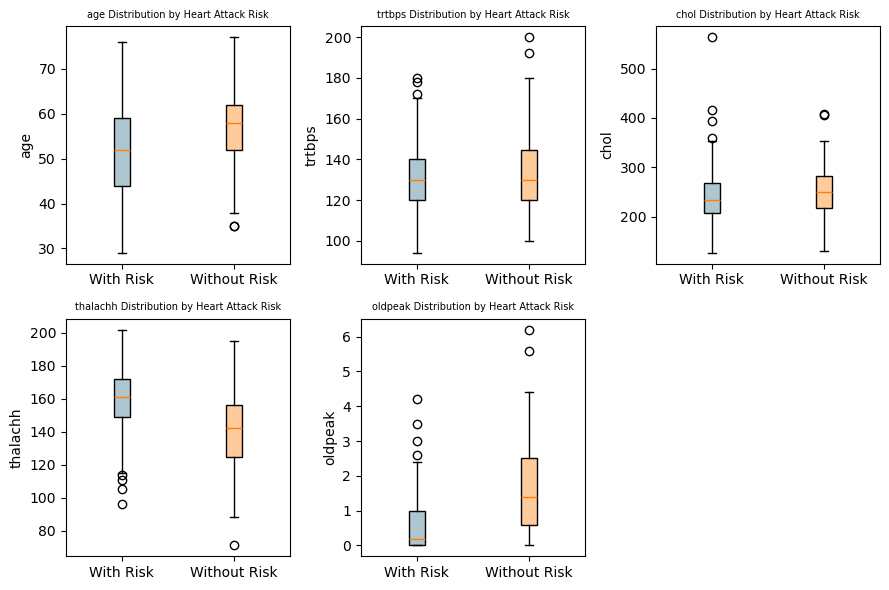

In [18]:
# health predictir df Vasualizing outliers. 
columns_to_plot=['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Determine the layout of the subplots
n_cols = 3  
n_rows = (len(columns_to_plot) + 3) // n_cols  # Determine the number of rows needed

# Define the pastel colors
pastel_peach = "#AEC6CF" 
pastel_green = "#FFCB9A"

# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate over the selected columns and create a box plot for each
for i, column in enumerate(columns_to_plot):
    # Boxplot for those with and without heart disease in each subplot
    bp=axes[i].boxplot([df_CVD_continuous[column].dropna(), 
                        df_no_CVD_continuous[column].dropna()], labels=['With Risk', 'Without Risk'],patch_artist=True)
    axes[i].set_title(f'{column} Distribution by Heart Attack Risk',fontsize=7)
    axes[i].set_ylabel(column)

# Color each boxplot differently
    for patch, color in zip(bp['boxes'],[pastel_peach, pastel_green]):
        patch.set_facecolor(color)

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.set_visible(False)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

In [19]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 26 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Data As Of                                                                               45 non-null     object 
 1   Start Date                                                                               45 non-null     object 
 2   End Date                                                                                 45 non-null     object 
 3   Jurisdiction of Occurrence                                                               45 non-null     object 
 4   Year                                                                                     45 non-null     int64  
 5   Month                                                             

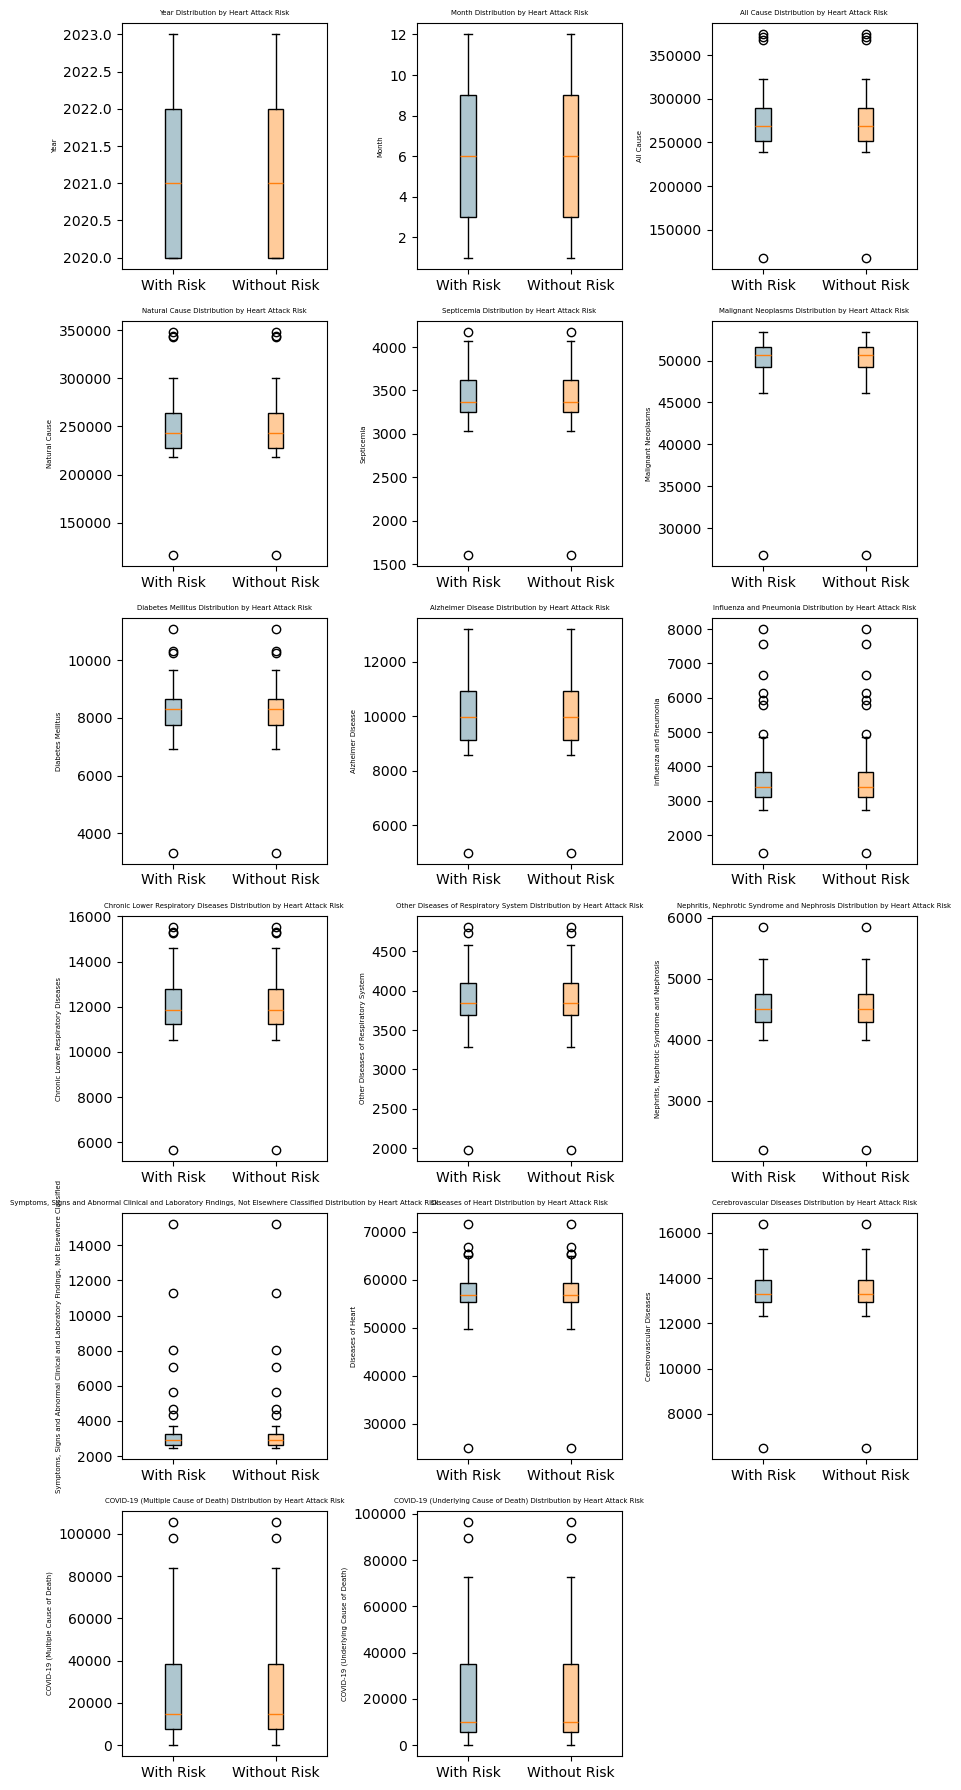

In [20]:
# trend df Vasualizing outliers. 
columns_to_plot=['Year', 'Month', 'All Cause', 'Natural Cause', 'Septicemia',
       'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease',
       'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome and Nephrosis',
       'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
        'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)']

# Define the pastel colors
pastel_peach = "#AEC6CF" 
pastel_green = "#FFCB9A" 

# Determine the layout of the subplots
n_cols = 3 
n_rows = (len(columns_to_plot) + 3) // n_cols  # Determine the number of rows needed


# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Iterate over the selected columns and create a box plot for each
for i, column in enumerate(columns_to_plot):
    # Boxplot for those with and without heart disease in each subplot
    bp=axes[i].boxplot([trend_df[column].dropna(),trend_df[column].dropna()], 
                       labels=['With Risk', 'Without Risk'],patch_artist=True)
    axes[i].set_title(f'{column} Distribution by Heart Attack Risk',fontsize=5)
    axes[i].set_ylabel(column,fontsize=5)

# Color each boxplot differently
    for patch, color in zip(bp['boxes'], [pastel_peach, pastel_green]):
        patch.set_facecolor(color)

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.set_visible(False)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

## 4. Explaratory Data Analysis.
### 4.1 Analysis of Heart-Related Mortality: 2020-2023

In [21]:
# Define colors and coloumns for the pie chart
pastel_colors = ['lightblue', '#ffdac1', '#e2f0cb', '#b5ead7', '#c3bef0', '#a9a9ff', '#ffc0cb']
selected_columns = ['Septicemia',
       'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease',
       'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome and Nephrosis',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose', 'COVID-19 (Multiple Cause of Death)']

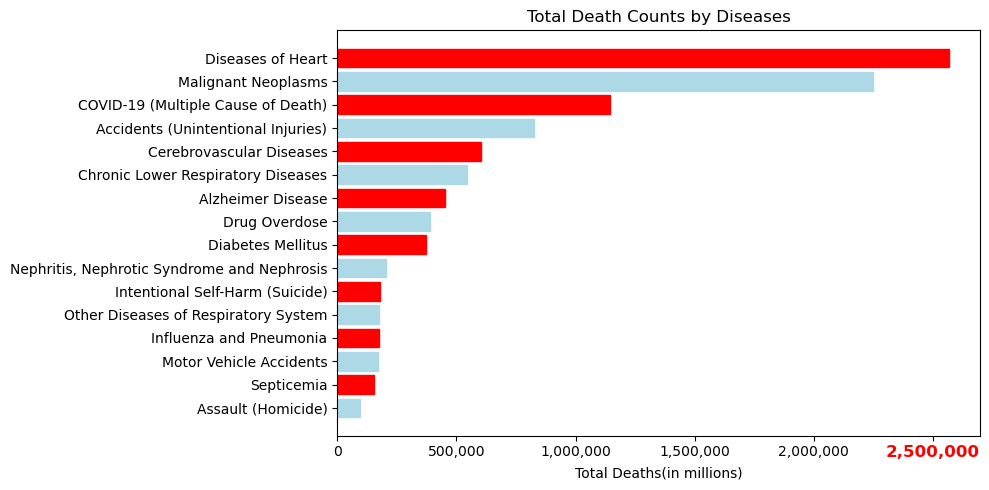

In [22]:
# Sum the values across rows for each disease to get the total counts for each disease
total_counts = trend_df[selected_columns].sum().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(total_counts.index, total_counts.values)

# Color the bars in pastel blue and red (alternating)
for index, bar in enumerate(bars):
    bar.set_color('lightblue' if index % 2 == 0 else 'red')

# Set labels and title
plt.xlabel('Total Deaths(in millions)')
plt.title('Total Death Counts by Diseases')

# Format the x-axis values to be more readable
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Highlight the x-axis value for "Diseases of Heart" in bold and a different color
for label in ax.get_xticklabels():
    if label.get_text() == '2,500,000':
        label.set_weight('bold')
        label.set_color('red')
        label.set_fontsize(12)  
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

### 4.2 Analysis 2020:
#### Reason of death vs Count(2020)

The total death count for Diseases of Heart in 2020 is: 698359.0


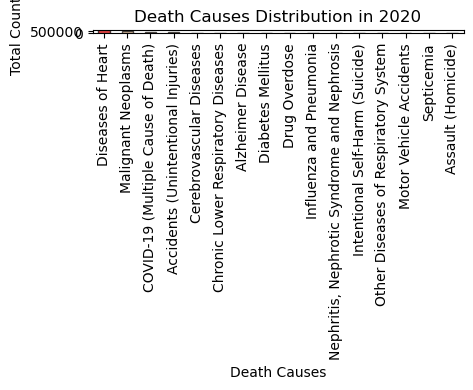

In [23]:
# Select data for the year 2020 from the DataFrame
year_data_2020 = trend_df[trend_df['Year'] == 2020]

# Sum the values across rows to get the total counts for each cause
total_counts = year_data_2020[selected_columns].sum(axis=0).sort_values(ascending=False)

# Find the maximum total count among all causes
total_counts_max = total_counts.max()

# Define a base color for all bars and a highlight color for 'Diseases of Heart'
base_color = "#FFCB9A"
highlight_color = "red" 

# Create a list of colors for each cause, highlighting 'Diseases of Heart'
colors = [highlight_color if cause == 'Diseases of Heart' else base_color for cause in total_counts.index]

# Create a bar chart
fig, ax = plt.subplots(figsize=(5,4))
total_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7, ax=ax)

# Set labels and title for the chart
ax.set_xlabel('Death Causes')
ax.set_ylabel('Total Counts')
ax.set_title('Death Causes Distribution in 2020')

# Customize the y-axis label for the value '700000'
for label in ax.get_yticklabels():
    if label.get_text() == '700000':
        label.set_weight('bold')
        label.set_color('red')
        label.set_fontsize(12)  

# Remove the grid lines
ax.grid(False)

# Print the total death count for 'Diseases of Heart' in 2020
print(f"The total death count for Diseases of Heart in 2020 is: {total_counts_max}")

# Customize the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=90)

# Ensure the plot is well-fitted within the figure area
plt.tight_layout()

# Display the bar chart
plt.show()

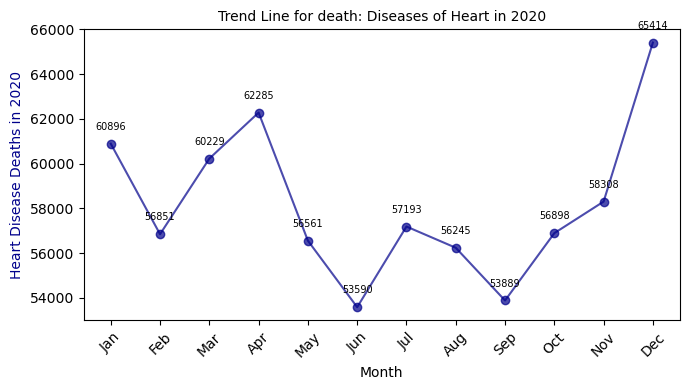

In [24]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Create the line graph with points (markers)
ax.plot(year_data_2020['Month'], year_data_2020['Diseases of Heart'], 
        color='darkblue', marker='o', alpha=0.7, linestyle='-', label='Trend Line')

# Set the y-axis label
ax.set_ylabel('Heart Disease Deaths in 2020', color='darkblue')

# Annotate the points with their values
for x, y in zip(year_data_2020['Month'], year_data_2020['Diseases of Heart']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7)

# Convert numerical month values to month names
month_names = [calendar.month_abbr[m] for m in year_data_2020['Month']]

# Set the x-axis tick labels
ax.set_xticks(year_data_2020['Month'])
ax.set_xticklabels(month_names, rotation=45)

# Set the title
plt.title('Trend Line for death: Diseases of Heart in 2020', fontsize=10)

# Set the x-axis label
plt.xlabel('Month')

# Remove grid
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

### 4.3 Analysis 2021:
####  Reason of death vs Count(2021)

The total death count for Diseases of Heart in 2021 is: 696773.0


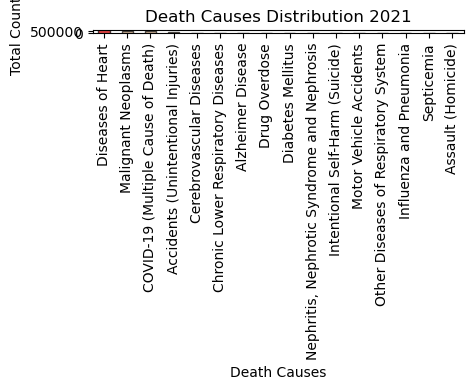

In [25]:
# Select data for the year 2021 from the DataFrame
year_data_2021 = trend_df[trend_df['Year'] == 2021]

# Sum the values across rows to get the total counts for each cause in 2021
total_counts = year_data_2021[selected_columns].sum(axis=0).sort_values(ascending=False)
total_counts_max=total_counts.max()

# Define a base color for all bars and a highlight color for 'Diseases of Heart'
base_color = "#FFCB9A"
colors = [highlight_color if cause == 'Diseases of Heart' else base_color for cause in total_counts.index]

# Create a bar chart for 2021 data
fig, ax = plt.subplots(figsize=(5,4))
total_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7, ax=ax)

# Set labels and title for 2021 data
ax.set_xlabel('Death Causes')
ax.set_ylabel('Total Counts')
ax.set_title('Death Causes Distribution 2021')


# Customize the y-axis label for a specific value, if present
for label in ax.get_yticklabels():
    if label.get_text() == '700000':
        label.set_weight('bold')
        label.set_color('red')
        label.set_fontsize(12)  

# Remove grid
ax.grid(False)
print(f"The total death count for Diseases of Heart in 2021 is: {total_counts_max}")

# Customize the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

##### Monthly Mortality of heart disease vs Count(2021)

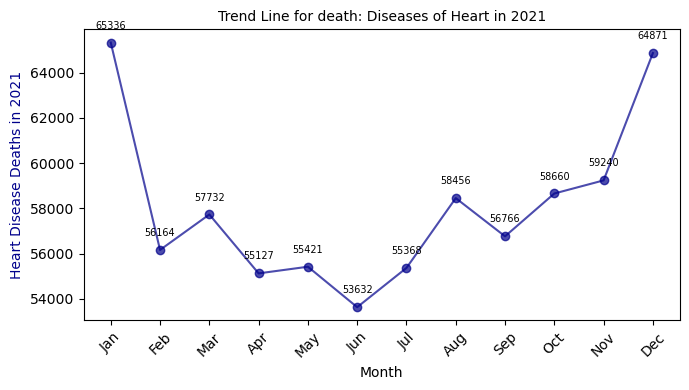

In [26]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Create the line graph with points (markers)
ax.plot(year_data_2021['Month'], year_data_2021['Diseases of Heart'], 
        color='darkblue', marker='o', alpha=0.7, linestyle='-', label='Trend Line')

# Set the y-axis label
ax.set_ylabel('Heart Disease Deaths in 2021', color='darkblue')

# Annotate the points with their values
for x, y in zip(year_data_2021['Month'], year_data_2021['Diseases of Heart']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7)

# Convert numerical month values to month names
month_names = [calendar.month_abbr[m] for m in year_data_2021['Month']]

# Set the x-axis tick labels
ax.set_xticks(year_data_2021['Month'])
ax.set_xticklabels(month_names, rotation=45)

# Set the title
plt.title('Trend Line for death: Diseases of Heart in 2021', fontsize=10)

# Set the x-axis label
plt.xlabel('Month')

# Remove grid
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

The trend line increases towards the end of the year, with a notable peak in December, indicating a rise in heart disease cases or deaths in that month. The trend line seems to follow the general pattern of the bars but smoothens out the monthly fluctuations.



### 4.4 Analysis 2022:
#### Reason of Death VS Count

The total death count for Diseases of Heart in 2022 is: 704786.0


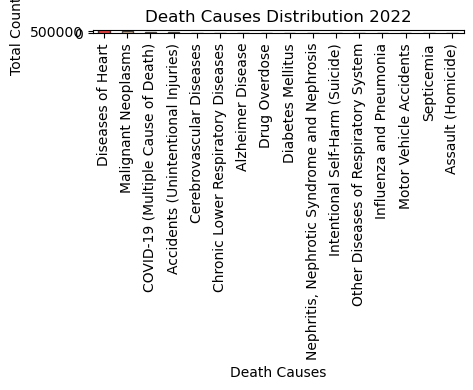

In [27]:
# Select data for the year 2022 from the DataFrame
year_data_2022 = trend_df[trend_df['Year'] == 2022]

# Sum the values across rows to get the total counts for each cause in 2022
total_counts = year_data_2022[selected_columns].sum(axis=0).sort_values(ascending=False)
total_counts_max=total_counts.max()

# Define a base color for all bars and a highlight color for 'Diseases of Heart'
base_color = "#FFCB9A"
highlight_color = "red"  
colors = [highlight_color if cause == 'Diseases of Heart' else base_color for cause in total_counts.index]

# Create a bar chart for 2022 data
fig, ax = plt.subplots(figsize=(5,4))
total_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7, ax=ax)

# Set labels and title for 2022 data
ax.set_xlabel('Death Causes')
ax.set_ylabel('Total Counts')
ax.set_title('Death Causes Distribution 2022')

# Customize the y-axis label for a specific value, if that value is present in the y-tick labels for 2022
for label in ax.get_yticklabels():
    if label.get_text() == '700000':
        label.set_weight('bold')
        label.set_color('red')
        label.set_fontsize(12) 

# Remove grid
ax.grid(False)
print(f"The total death count for Diseases of Heart in 2022 is: {total_counts_max}")

# Customize the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#### Monthly Mortality of heart disease vs Count(2021)

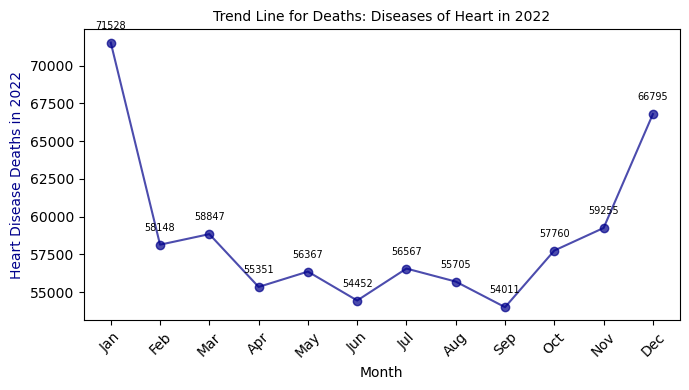

In [28]:
# Select data for the year 2020 from the DataFrame
year_data_2022 = trend_df[trend_df['Year'] == 2022]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Create the line graph with points (markers)
ax.plot(year_data_2022['Month'], year_data_2022['Diseases of Heart'], 
        color='darkblue', marker='o', alpha=0.7, linestyle='-', label='Trend Line')

# Set the y-axis label
ax.set_ylabel('Heart Disease Deaths in 2022', color='darkblue')

# Annotate the points with their values
for x, y in zip(year_data_2022['Month'], year_data_2022['Diseases of Heart']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7)

# Convert numerical month values to month names
month_names = [calendar.month_abbr[m] for m in year_data_2022['Month']]

# Set the x-axis tick labels
ax.set_xticks(year_data_2022['Month'])
ax.set_xticklabels(month_names, rotation=45)

# Set the title
plt.title('Trend Line for Deaths: Diseases of Heart in 2022', fontsize=10)

# Set the x-axis label
plt.xlabel('Month')

# Remove grid
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

The trend line, which appears to correspond to the right y-axis, suggests an overall fluctuating trend with the highest point in January, a dip in the spring and early summer months, and a rise towards the end of the year. The exact values for the trend line are not visible but can be inferred from its intersection with the y-axis. It shows an increase from November to December, which is in line with the bar graph data, indicating that December had the highest count following January.

### 4.5 Analysis 2023:
#### Reason of death vs Count(2023)

The total death count for Diseases of Heart in 2023 is: 469163.0


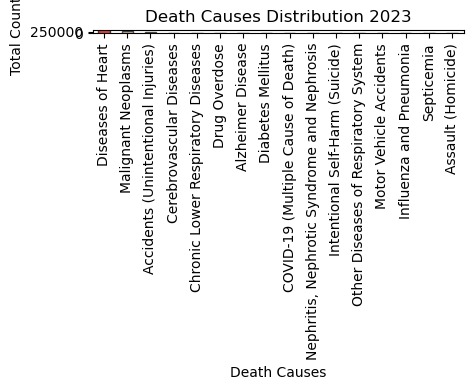

In [29]:
# Select data for the year 2023 from the DataFrame
year_data_2023 = trend_df[trend_df['Year'] == 2023]

# Sum the values across rows to get the total counts for each cause in 2023
total_counts = year_data_2023[selected_columns].sum(axis=0).sort_values(ascending=False)
total_counts_max=total_counts.max()

# Define a base color for all bars and a highlight color for 'Diseases of Heart'
base_color = "#FFCB9A"
highlight_color = "red"  
colors = [highlight_color if cause == 'Diseases of Heart' else base_color for cause in total_counts.index]

# Create a bar chart for 2023 data
fig, ax = plt.subplots(figsize=(5,4))
total_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.7, ax=ax)

# Set labels and title for 2023 data
ax.set_xlabel('Death Causes')
ax.set_ylabel('Total Counts')
ax.set_title('Death Causes Distribution 2023')

# Customize the y-axis label for a specific value, if that value is present in the y-tick labels for 2022
for label in ax.get_yticklabels():
    if label.get_text() == '400000':
        label.set_weight('bold')
        label.set_color('red')
        label.set_fontsize(12)  

# Remove grid
ax.grid(False)
print(f"The total death count for Diseases of Heart in 2023 is: {total_counts_max}")

# Customize the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

##### Monthly Mortality of heart disease vs Count(2023)

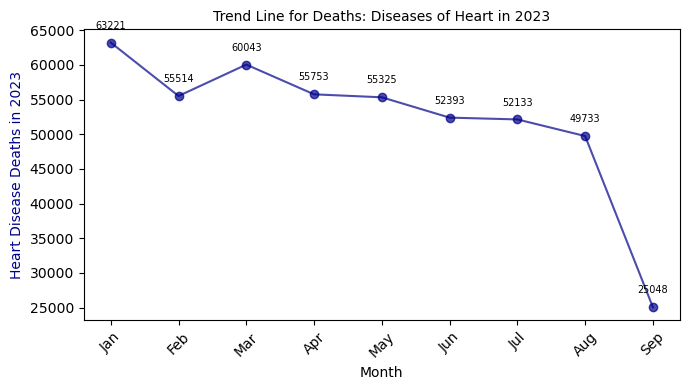

In [30]:

year_data_2022 = trend_df[trend_df['Year'] == 2023]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 4))

# Create the line graph with points (markers)
ax.plot(year_data_2023['Month'], year_data_2023['Diseases of Heart'], 
        color='darkblue', marker='o', alpha=0.7, linestyle='-', label='Trend Line')

# Set the y-axis label
ax.set_ylabel('Heart Disease Deaths in 2023', color='darkblue')

# Annotate the points with their values
for x, y in zip(year_data_2023['Month'], year_data_2023['Diseases of Heart']):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7)

# Convert numerical month values to month names
month_names = [calendar.month_abbr[m] for m in year_data_2022['Month']]

# Set the x-axis tick labels
ax.set_xticks(year_data_2023['Month'])
ax.set_xticklabels(month_names, rotation=45)

# Set the title
plt.title('Trend Line for Deaths: Diseases of Heart in 2023', fontsize=10)

# Set the x-axis label
plt.xlabel('Month')

# Remove grid
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

### 4.6 Year-year growth rate.

Year: 2020, Growth Rate: 0.00%
Year: 2021, Growth Rate: -0.23%
Year: 2022, Growth Rate: 1.15%
Year: 2023, Growth Rate: -33.43%


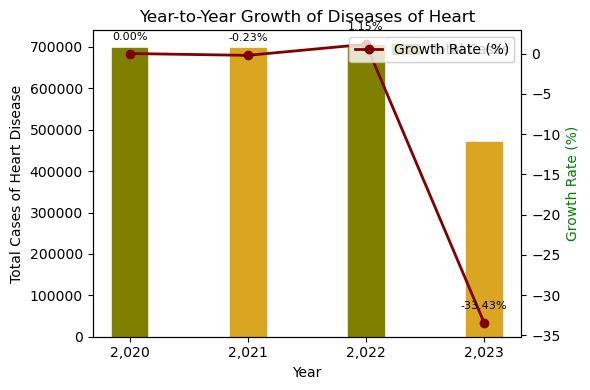

In [31]:
# Group by 'Year' and sum the 'Diseases of Heart' cases for each year
heart_disease_yearly = trend_df.groupby('Year')['Diseases of Heart'].sum().reset_index()

# Calculate the growth rate
# The growth rate is calculated as the current year's total cases minus the previous year's total cases,
# divided by the previous year's total cases.
heart_disease_yearly['Growth Rate'] = heart_disease_yearly['Diseases of Heart'].pct_change()

# Assigning a 0% growth rate to the year 2020 in the 'Growth Rate' column for visualization purposes
heart_disease_yearly.loc[heart_disease_yearly['Year'] == 2020, 'Growth Rate'] = 0

# Plotting the data again
fig, ax1 = plt.subplots(figsize=(6, 4))  

# Print the year and its corresponding growth rate
for year, growth_rate in zip(heart_disease_yearly['Year'], heart_disease_yearly['Growth Rate']):
    print(f"Year: {year}, Growth Rate: {growth_rate:.2%}")


# Bar plot for the total cases of heart disease with reduced width
bars=ax1.bar(heart_disease_yearly['Year'], heart_disease_yearly['Diseases of Heart'],
        color='peachpuff', edgecolor='black', width=0.3, label='Total Cases')

# Set the x-axis to have tick marks at every year, and format the ticks to show commas
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Color the bars in pastel blue and red (alternating)
for index, bar in enumerate(bars):
    bar.set_color('olive' if index % 2 == 0 else 'goldenrod')

# Create the secondary y-axis for the growth rate
ax2 = ax1.twinx()

# Plot the growth rate, ensuring it has a visible line width and style
ax2.plot(heart_disease_yearly['Year'], heart_disease_yearly['Growth Rate']*100,
         color='maroon', marker='o', linestyle='-', linewidth=2, label='Growth Rate (%)')

# Annotate the line graph with the percentage growth rate
for x, y in zip(heart_disease_yearly['Year'], heart_disease_yearly['Growth Rate']*100):
    ax2.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Set the y-axis labels
ax1.set_ylabel('Total Cases of Heart Disease', color='black')
ax2.set_ylabel('Growth Rate (%)', color='green')

# Set the x-axis label
ax1.set_xlabel('Year')

# Title and legend
plt.title('Year-to-Year Growth of Diseases of Heart')

# Display the legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

## 5. Univariate analysis of Continous variables
### 5.1 Gender VS Heart Risk Count:

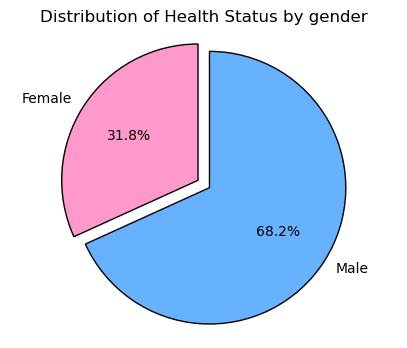

In [32]:
# Group the data by 'sex' and count occurrences of 'output'
grouped = health_predictor_df.groupby('sex')['output'].count()

# Define custom colors for the pie chart
colors = ['#FF99CC', '#66B2FF']

# Define an explode list to highlight a specific segment (e.g., 'Male')
explode = (0.1, 0)  # 'Male' (1) will be exploded by 10%

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(grouped, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode,wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Health Status by gender')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

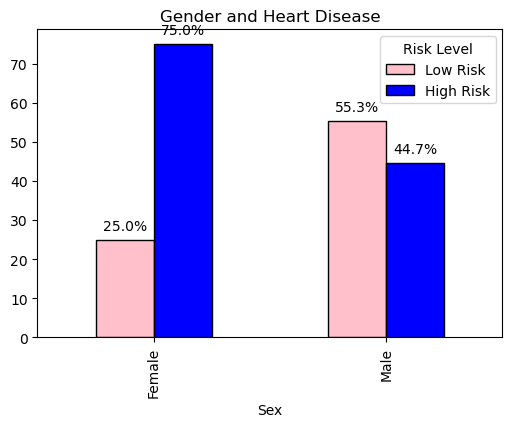

Percentage of low and high risk by gender:
output     0     1
sex               
0       25.0  75.0
1       55.3  44.7


In [33]:
# Grouping by 'sex' and 'output' and counting occurrences
sex_output_counts = health_predictor_df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_output_correct_percentages = sex_output_counts.div(sex_output_counts.sum(axis=1), axis=0)

# Define new colors: pink and green
colors_pink_green = ['pink', 'blue']

# Recreating the plot with the pink and green color scheme
fig, ax = plt.subplots(figsize=(6, 4))
(sex_output_correct_percentages * 100).plot(kind='bar', ax=ax, color=colors_pink_green, edgecolor='black')

# Adding a title
ax.set_title('Gender and Heart Disease')

# Change legend labels to 'Low Risk' for 0 and 'High Risk' for 1
ax.legend(title='Risk Level', labels=['Low Risk', 'High Risk'])

# Set labels for the x-axis with the correct sex mapping
ax.set_xlabel('Sex')
ax.set_xticklabels(['Female', 'Male'])  # Setting labels as per the mapping
ax.grid(False)

# Annotate percentages on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot with new colors and correct labels and percentages
plt.show()

# Printing the correct percentages
print("Percentage of low and high risk by gender:")
print((sex_output_correct_percentages * 100).round(1))

Females in this sample have a high-risk percentage for CVD that stands at 75.0%, which is a substantial majority of the female group.
Males have a lower high-risk percentage than females, with 44.7% falling into the high-risk category.

### 5.2 Age 
#### 5.2.1 Age distribution(histogram)

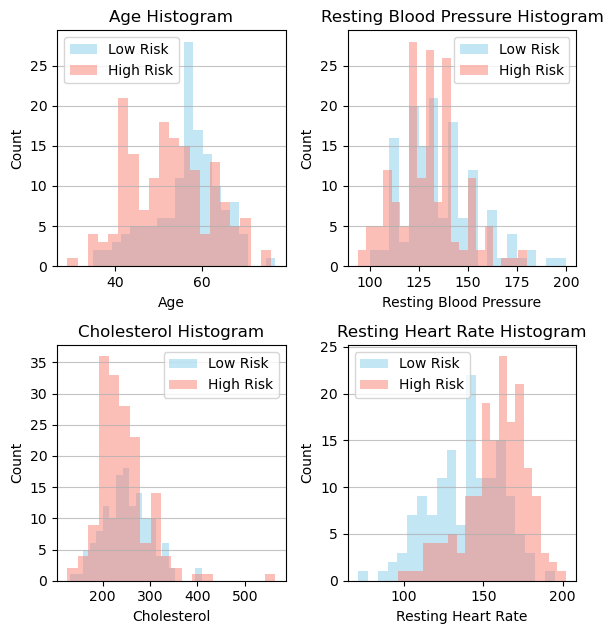

In [34]:
# Features to plot
features_to_plot = ['age', 'trtbps', 'chol', 'thalachh']

# Label names for the features
label_names = {
    'age': 'Age',
    'trtbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'thalachh': 'Resting Heart Rate'
}

# Creating histograms for each feature, separated by the 'output' class
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 7))  

# Flattening the 2D array of axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # Separate the data by output class (low risk and high risk)
    no_risk = health_predictor_df[health_predictor_df['output'] == 0][feature]
    high_risk = health_predictor_df[health_predictor_df['output'] == 1][feature]

    # Plot the histograms on the same axes for comparison
    axes[i].hist(no_risk, bins=20, color='skyblue', alpha=0.5, label='Low Risk')
    axes[i].hist(high_risk, bins=20, color='salmon', alpha=0.5, label='High Risk')
    
    # Set the title and labels, change label name based on the feature
    axes[i].set_title(f'{label_names.get(feature, feature)} Histogram')
    axes[i].set_xlabel(label_names.get(feature, feature))
    axes[i].set_ylabel('Count')
    
    # Adding a legend for each subplot
    axes[i].legend()
    
    # Add grid lines to y-axis for better visualization
    axes[i].grid(axis='y', alpha=0.75)

# Adjust the layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

#### 5.2.2 Age distribution (Density plot)

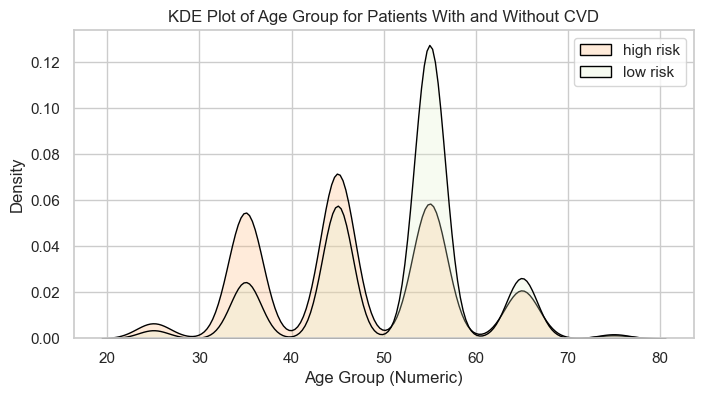

In [35]:
# Define the age bins and labels for the new age group ranges
bins = [18, 25, 35, 45, 55, 65, 75, float('inf')]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Categorize the age data into bins
health_predictor_df['Age group'] = pd.cut(health_predictor_df['age'], bins=bins, labels=age_labels)

# Create a mapping of 'Age group' categories to numerical values
age_group_mapping = {
    '18-25': 18,
    '26-35': 25,
    '36-45': 35,
    '46-55': 45,
    '56-65': 55,
    '66-75': 65,
    '75+': 75
}
# Convert the 'Age group Numeric' column to int to ensure it is treated as numeric
health_predictor_df['Age group Numeric'] = health_predictor_df['Age group'].map(age_group_mapping).astype(int)

# Split the data into two subsets based on the 'output' value
df_CVD = health_predictor_df[health_predictor_df['output'] == 1]
df_no_CVD = health_predictor_df[health_predictor_df['output'] == 0]



# Set the Seaborn style (optional)
sns.set(style="whitegrid")

# Create a KDE plot using the numeric 'Age group Numeric' column
plt.figure(figsize=(8, 4)) 

sns.kdeplot(df_CVD['Age group Numeric'], color='#ffb16d', shade=True, label='high risk', bw_adjust=0.5,edgecolor="black")
sns.kdeplot(df_no_CVD['Age group Numeric'], color='#e2f0cb', shade=True, label='low risk', bw_adjust=0.5,edgecolor="black")

# Add labels and title
plt.xlabel('Age Group (Numeric)')
plt.ylabel('Density')
plt.title('KDE Plot of Age Group for Patients With and Without CVD')
plt.legend()


# Show the plot
plt.show()

**Interpretation:**
There is a peak in the density of patients with high risk around the age of 60, which suggests that the occurrence of CVD is most common in this age group within this sample.
For patients at low risk, the density is more evenly distributed across ages but with a slight peak around the age of 30.
There is a noticeable difference in the density distributions between patients with CVD and those without, particularly in the 50-70 age range. This indicates that within this sample, CVD is more prevalent in older age groups.
The plot also shows smaller peaks for both groups around the ages of 40 and 70, suggesting smaller clusters of CVD incidence in these age ranges.

#### 5.2.3 Age distribution for Male and Female for heart disease.

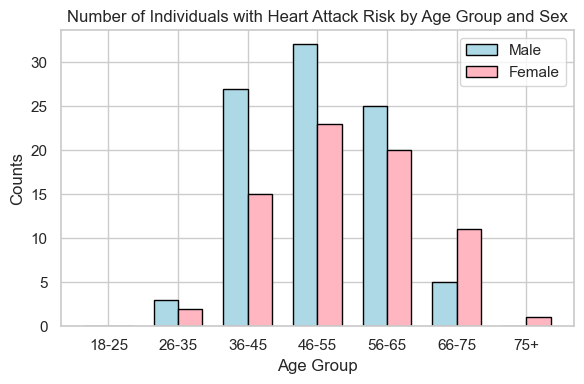

In [36]:
# Convert 'Age group Numeric' to a numeric type to be certain
df['Age group Numeric'] = pd.to_numeric(df['Age group Numeric'], errors='coerce')
df_CVD = health_predictor_df[health_predictor_df['output'] == 1]

# Define the age bins and labels for the new age group ranges
bins = [18, 25, 35, 45, 55, 65, 75, float('inf')]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Categorize the age data into bins
df_CVD['Age group'] = pd.cut(df_CVD['age'], bins=bins, labels=age_labels)

# Create a new figure and axis object for the subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot
# Get counts by sex and age group
male_counts = df_CVD[df_CVD['sex'] == 1].groupby('Age group').size().reindex(age_labels)
female_counts = df_CVD[df_CVD['sex'] == 0].groupby('Age group').size().reindex(age_labels)

# Positions of the age group categories
positions = np.arange(len(age_labels))

# Width of the bars in the bar plot
width = 0.35  # Set a width for the bars

# Bar plot for males
ax.bar(positions - width/2, male_counts, width, color='lightblue', edgecolor='black', label='Male')

# Bar plot for females
ax.bar(positions + width/2, female_counts, width, color='lightpink', edgecolor='black', label='Female')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Counts')
ax.set_title('Number of Individuals with Heart Attack Risk by Age Group and Sex')

# Replace the numeric x-ticks with the actual categorical names
ax.set_xticks(positions)
ax.set_xticklabels(age_labels)
ax.legend()


# Display the plot with a tight layout
plt.tight_layout()
plt.show()


**Interpretation:**
*In the 26-35 age group, there are more male individuals at risk of a heart attack than female individuals.
*The 36-45 and 46-55 age groups show the highest number of individuals at risk, with males outnumbering females in both categories.
*In the 56-65 age group, the numbers are still high but slightly less than in the 46-55 age group, with males again showing a higher risk count.
*For the 66-75 age group, there is a notable decrease in the number of individuals at risk, with female individuals showing a lesser count than males.
*In the 75+ age group, the risk count for both males and females drops further, with females showing a more significant decrease.

### 5.3 Cholestrol distribution:(Density graph)

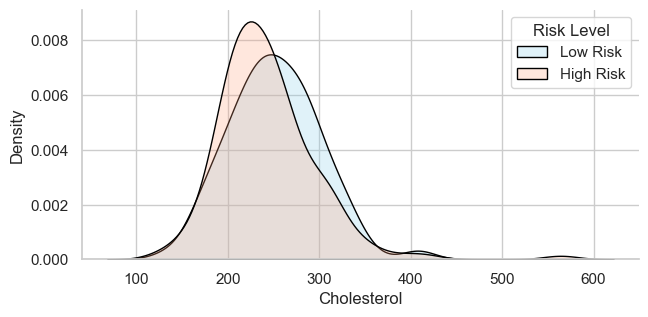

In [37]:
# Define pastel colors
pastel_colors = ["#87CEEB", "#FFA07A"]

# Create a FacetGrid with the pastel color palette, but do not add a legend automatically
g = sns.FacetGrid(health_predictor_df, hue="output", aspect=3, height=5, palette=pastel_colors)
g.map(sns.kdeplot, 'chol', shade=True,edgecolor='black')
# Change legend labels
legend_labels = {0: "Low Risk", 1: "High Risk"}

# Obtain the handles and labels from the current plot
handles, old_labels = g.ax.get_legend_handles_labels()

# Create a legend with the new labels
new_labels = [legend_labels[int(old_label)] for old_label in old_labels]
g.ax.legend(handles=handles, title="Risk Level", labels=new_labels)

# Set titles, labels, and display the plot
g.set_titles("KDE Plot by Risk Level")
g.set_xlabels("Cholesterol")
g.set_ylabels("Density")

# Change the figure size (width, height) here
g.fig.set_size_inches(6, 3) # This changes the size of the FacetGrid plot
plt.show()

### 5.4 Resting Blood Pressure distribution:(Density graph)

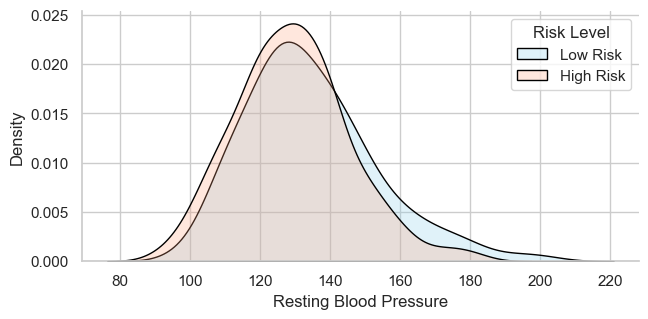

In [38]:
# Define pastel colors
pastel_colors = ["#87CEEB", "#FFA07A"]

# Create a FacetGrid with the pastel color palette, but do not add a legend automatically
g = sns.FacetGrid(health_predictor_df, hue="output", aspect=3, height=5, palette=pastel_colors)
g.map(sns.kdeplot, 'trtbps', shade=True,edgecolor='black')

# Change legend labels
legend_labels = {0: "Low Risk", 1: "High Risk"}

# Obtain the handles and labels from the current plot
handles, old_labels = g.ax.get_legend_handles_labels()

# Create a legend with the new labels
new_labels = [legend_labels[int(old_label)] for old_label in old_labels]
g.ax.legend(handles=handles, title="Risk Level", labels=new_labels)

# Set titles, labels, and display the plot
g.set_titles("Resting Blood Pressure Vs Density")
g.set_xlabels("Resting Blood Pressure")
g.set_ylabels("Density")

# Change the figure size (width, height) here
g.fig.set_size_inches(6, 3) # This changes the size of the FacetGrid plot
plt.show()

### 5.5 Resting Heart Beat distribution:(Density graph)

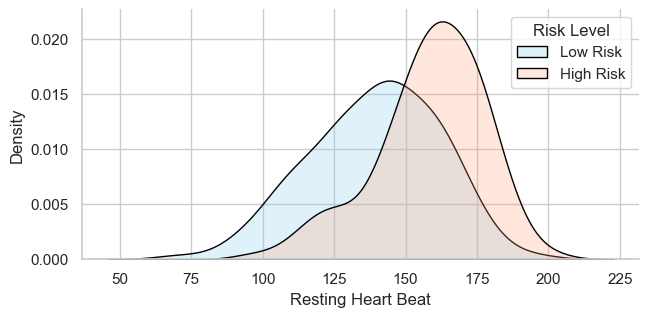

In [39]:
# Define pastel colors
pastel_colors = ["#87CEEB", "#FFA07A"]

# Create a FacetGrid with the pastel color palette, but do not add a legend automatically
g = sns.FacetGrid(health_predictor_df, hue="output", aspect=3, height=5, palette=pastel_colors)
g.map(sns.kdeplot, 'thalachh', shade=True,edgecolor='black')

# Change legend labels
legend_labels = {0: "Low Risk", 1: "High Risk"}

# Obtain the handles and labels from the current plot
handles, old_labels = g.ax.get_legend_handles_labels()

# Create a legend with the new labels
new_labels = [legend_labels[int(old_label)] for old_label in old_labels]
g.ax.legend(handles=handles, title="Risk Level", labels=new_labels)

# Set titles, labels, and display the plot
g.set_titles("Resting Heart Beat Vs Density")
g.set_xlabels("Resting Heart Beat")
g.set_ylabels("Density")

# Change the figure size (width, height) here
g.fig.set_size_inches(6, 3) # This changes the size of the FacetGrid plot
plt.show()

### 5.6 Continous variables(Density graph)

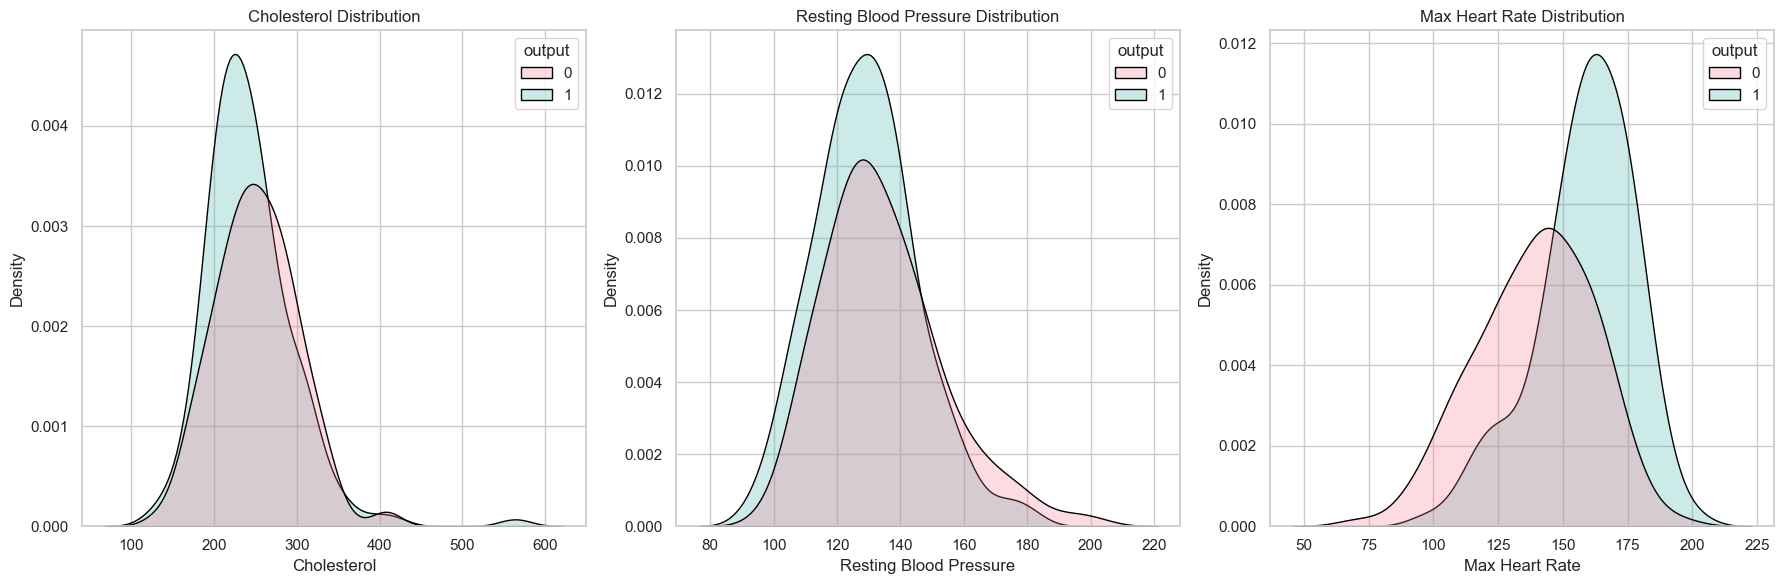

In [40]:
#Define color palette for hue levels
palette = sns.color_palette("husl", health_predictor_df['output'].nunique())

# Create a figure for subplots
plt.figure(figsize=(18, 6))

# First subplot for 'chol'
plt.subplot(1, 3, 1)
sns.kdeplot(data=health_predictor_df, x='chol', hue='output', shade=True, palette=palette, edgecolor='black')
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Density")


# Second subplot for 'trtbps'
plt.subplot(1, 3, 2)
sns.kdeplot(data=health_predictor_df, x='trtbps', hue='output', shade=True, palette=palette, edgecolor='black')
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Density")

# Third subplot for 'thalachh'
plt.subplot(1, 3, 3)
sns.kdeplot(data=health_predictor_df, x='thalachh', hue='output', shade=True, palette=palette, edgecolor='black')
plt.title("Max Heart Rate Distribution")
plt.xlabel("Max Heart Rate")
plt.ylabel("Density")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

**Interpretation:**
* The data for lowrisk and highrisk have significant overlap, with both peaking around the same cholesterol value but 'output 1' having a slightly wider spread.
* There is a clear distinction between lowrisk and highrisk with high peaking at a higher blood pressure value than 'lowrisk'.
*  The distributions for 'highrisk' and 'lowrisk' peak at different values, suggesting a potential difference in maximum heart rate between the two groups.

## 6. Univariate Analysis for Catogerical columns

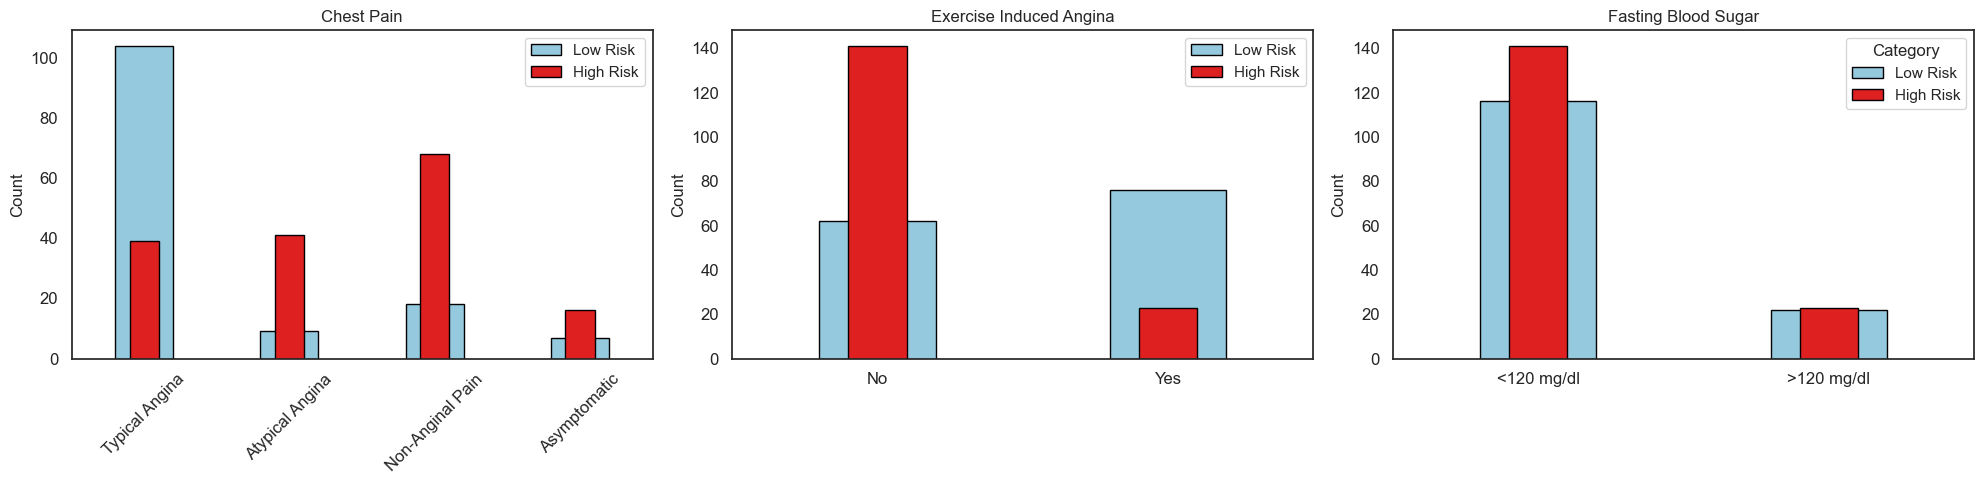

In [41]:
# Set the overall aesthetics
sns.set(style="white")

# Configure font sizes for everything
mpl.rcParams['font.size'] = 12  # Adjust the font size as needed
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# New titles for the plots
new_titles = ['Chest Pain', 'Exercise Induced Angina', 'Fasting Blood Sugar']

# Define the features to plot 
features_to_plot_cat = ['cp', 'exng', 'fbs']

# Set the palette for category 0
sns.set_palette(["#87CEEB"])  

# Create a figure and a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5)) 

# Plot each subplot
for i, feature in enumerate(features_to_plot_cat):
    ax = axes[i]
    # Plot category 0
    sns.countplot(x=feature, data=health_predictor_df[health_predictor_df['output'] == 0], 
                  label='Low Risk', color="#87CEEB", edgecolor='black', ax=ax, width=0.4)
    # Plot category 1
    sns.countplot(x=feature, data=health_predictor_df[health_predictor_df['output'] == 1], 
                  label='High Risk', color="red", edgecolor='black', ax=ax, width=0.2)
    ax.set_title(new_titles[i])
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # Custom x-tick labels and legend positioning
    if feature == 'cp':
        ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], rotation=45)
    elif feature == 'exng':
        ax.set_xticklabels(['No', 'Yes'])
    elif feature == 'fbs':
        ax.set_xticklabels(['<120 mg/dl', '>120 mg/dl'])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Create custom legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Low Risk', 'High Risk'], title='Category')

# Display the plot
plt.show()

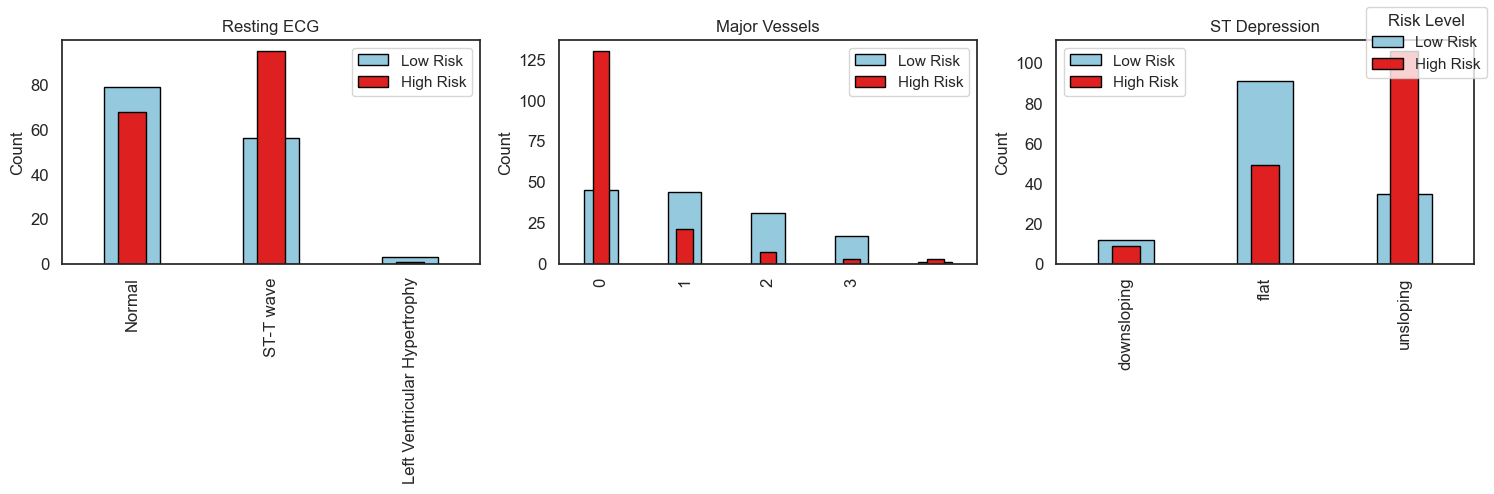

In [42]:
# Define the layout of the subplots
n_rows = 1
n_cols = 3
features_to_plot_cat = ['restecg', 'caa', 'slp']

# New titles for the plots with corrected spelling and formatting
new_titles = [
    'Resting ECG',
    'Major Vessels',
    'ST Depression'
]

# Set the palette for category 0
sns.set_palette(["#87CEEB"])  # Light blue for Low Risk

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))

# Plot each subplot
for i, feature in enumerate(features_to_plot_cat):
    ax = axes[i]
    # Plot category 0
    sns.countplot(x=feature, data=health_predictor_df[health_predictor_df['output'] == 0], 
                  label='Low Risk', color="#87CEEB", edgecolor='black', ax=ax, width=0.4)
    # Plot category 1
    sns.countplot(x=feature, data=health_predictor_df[health_predictor_df['output'] == 1], 
                  label='High Risk', color="red", edgecolor='black', ax=ax, width=0.2)
    ax.set_title(new_titles[i])
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    # Mapping for custom x-axis labels
    x_axis_label_mapping = {
        'restecg': ['Normal', 'ST-T wave', 'Left Ventricular Hypertrophy'],
        'caa': ['0', '1', '2', '3'],
        'slp': ['downsloping', 'flat', 'unsloping']
    }
    ax.set_xticklabels(x_axis_label_mapping.get(feature, []), rotation=90)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Create custom legends
handles, labels = axes[1].get_legend_handles_labels() 
fig.legend(handles, ['Low Risk', 'High Risk'], title='Risk Level', loc='upper right')

# Display the plot
plt.show()

**Interpretation:**
* Females tend to have a higher proportion of individuals classified as low-risk compared to males, indicating that gender plays a role in cardiovascular risk assessment.
* Individuals with Typical Angina chest pain (typically considered low severity) are more often classified as low-risk, suggesting that less severe chest pain may be associated with a lower cardiovascular risk.
* Having a normal resting electrocardiogram (Left Ventricular Hypertrophy) is associated with a lower risk classification for the condition in question, highlighting the importance of this diagnostic indicator in assessing cardiovascular risk.
* Having no major blood vessels affected (category 0) is correlated with a low-risk classification, indicating that the number of affected vessels is a significant factor in risk assessment, with fewer affected vessels being more favorable.
* A certain type of ST segment slope during peak exercise (unsloping) is more frequently associated with high-risk classifications, suggesting that this particular ST segment slope may be a critical predictor of cardiovascular events.
* The absence of an exercise-induced angina condition  corresponds to a higher count of individuals being classified as high-risk, suggesting that exercise may have an impact on cardiovascular health and can influence risk assessment.
* A lower fasting blood sugar level (<120 mg/dl) is predominant among those classified as high risk group suggest the negative correlation with heart risk.

## 7. Bi-variate Analysis
### 7.1 Age v s Blood Pressure.

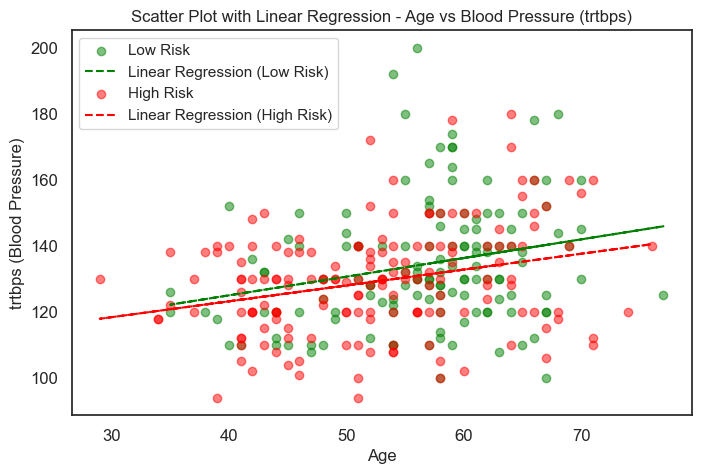

In [43]:
# Separate data for 'Low Risk' and 'High Risk'
low_risk_data = health_predictor_df[health_predictor_df['output'] == 0]
high_risk_data = health_predictor_df[health_predictor_df['output'] == 1]

# Scatter plot for Low Risk
plt.figure(figsize=(8, 5))
if not low_risk_data.empty:
    plt.scatter(low_risk_data['age'], low_risk_data['trtbps'], alpha=0.5, label='Low Risk', color='green')

    # Linear regression for Low Risk
    coefficients_low = np.polyfit(low_risk_data['age'], low_risk_data['trtbps'], 1)
    linear_regression_low = coefficients_low[0] * low_risk_data['age'] + coefficients_low[1]

    # Plot linear regression line for Low Risk
    plt.plot(low_risk_data['age'], linear_regression_low, color='green', linestyle='--', label='Linear Regression (Low Risk)')

# Scatter plot for High Risk
if not high_risk_data.empty:
    plt.scatter(high_risk_data['age'], high_risk_data['trtbps'], alpha=0.5, label='High Risk', color='red')

    # Linear regression for High Risk
    coefficients_high = np.polyfit(high_risk_data['age'], high_risk_data['trtbps'], 1)
    linear_regression_high = coefficients_high[0] * high_risk_data['age'] + coefficients_high[1]

    # Plot linear regression line for High Risk
    plt.plot(high_risk_data['age'], linear_regression_high, color='red', linestyle='--', label='Linear Regression (High Risk)')

plt.title('Scatter Plot with Linear Regression - Age vs Blood Pressure (trtbps)')
plt.xlabel('Age')
plt.ylabel('trtbps (Blood Pressure)')
plt.legend()

plt.show()


### 7.2 Blood Pressure vs cholestrol

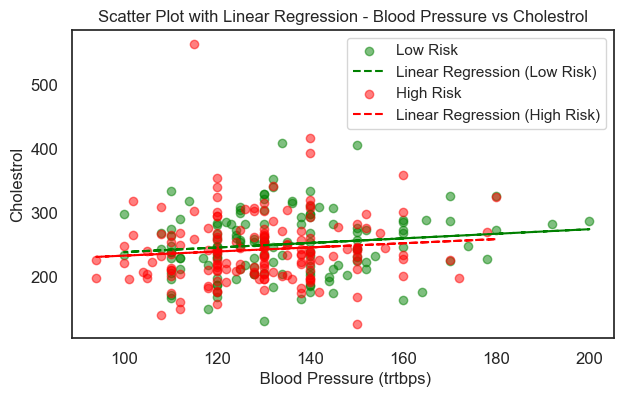

In [44]:
# Separate data for 'Low Risk' and 'High Risk'
low_risk_data = health_predictor_df[health_predictor_df['output'] == 0]
high_risk_data = health_predictor_df[health_predictor_df['output'] == 1]

# Scatter plot for Low Risk
plt.figure(figsize=(7, 4))
if not low_risk_data.empty:
    plt.scatter(low_risk_data['trtbps'], low_risk_data['chol'], alpha=0.5, label='Low Risk', color='green')

    # Linear regression for Low Risk
    coefficients_low = np.polyfit(low_risk_data['trtbps'], low_risk_data['chol'], 1)
    linear_regression_low = coefficients_low[0] * low_risk_data['trtbps'] + coefficients_low[1]

    # Plot linear regression line for Low Risk
    plt.plot(low_risk_data['trtbps'], linear_regression_low, color='green', linestyle='--', label='Linear Regression (Low Risk)')

# Scatter plot for High Risk
if not high_risk_data.empty:
    plt.scatter(high_risk_data['trtbps'], high_risk_data['chol'], alpha=0.5, label='High Risk', color='red')

    # Linear regression for High Risk
    coefficients_high = np.polyfit(high_risk_data['trtbps'], high_risk_data['chol'], 1)
    linear_regression_high = coefficients_high[0] * high_risk_data['trtbps'] + coefficients_high[1]

    # Plot linear regression line for High Risk
    plt.plot(high_risk_data['trtbps'], linear_regression_high, color='red', linestyle='--', label='Linear Regression (High Risk)')

plt.title('Scatter Plot with Linear Regression - Blood Pressure vs Cholestrol')
plt.xlabel(' Blood Pressure (trtbps)')
plt.ylabel('Cholestrol')
plt.legend()

plt.show()

**Interpretation:**
The scatter plot indicates that for the Low Risk group, there is a negligible correlation between Blood Pressure and Cholesterol, as reflected by the near-horizontal slope of the regression line. This suggests that variations in Blood Pressure do not predict changes in Cholesterol levels for this group. For the High Risk group, there's a weak positive correlation, with the regression line showing a slight upward slope, indicating that higher Blood Pressure might be associated with higher Cholesterol levels, but the relationship is not strong.The above scatter plot suggests that as age increases, there is a tendency for blood pressure to rise in both Low Risk and High Risk groups, with the High-Risk group showing a more pronounced increase. The distinction between the groups could imply that the High-Risk category is more susceptible to increased blood pressure as they age compared to the Low-Risk category.

## 8.Statical Analysis
### 8.1 Pointbiserial of Heart Attack Risk and Continous Variables

In [45]:
# First, we'll make sure that 'output' is treated as a float
df_continuous['output'] = df_continuous['output'].astype('float')

# Now, compute the point-biserial correlation for the specified variables
correlation_pointbiserial = df_continuous[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']].apply(
    lambda x: stats.pointbiserialr(x, df_continuous['output']).correlation
)

correlation_pointbiserial

age        -0.225439
trtbps     -0.144931
chol       -0.085239
thalachh    0.421741
oldpeak    -0.430696
dtype: float64

In [46]:
# Rename the index values to the specified names
rename_map = {
    'age': 'Age',
    'trtbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'thalachh': 'Maximum Heart Rate'
}
# Create and transpose the DataFrame
heart_attack_risk_1 = pd.DataFrame(correlation_pointbiserial)

# Apply the renaming
heart_attack_risk_1.rename(index=rename_map, inplace=True)

# Add a 'Correlation' column
heart_attack_risk_1['Correlation'] = heart_attack_risk_1.apply(
    lambda x: 'Strongly Positively Correlated' if x[0] > 0.4 else 
              'Weakly Positively Correlated' if x[0] > 0 else
              'Negatively Correlated', axis=1
)

# Rename the 0 column to 'Value'
heart_attack_risk_1.rename(columns={heart_attack_risk_1.columns[0]: 'Value'}, inplace=True)

# Reset the index to include it as a column
tabular_form = heart_attack_risk_1.reset_index()

# Rename the columns as specified
tabular_form.rename(columns={'index': 'Variable'}, inplace=True)

# Define the color coding function
def colour_numbers(value):
    if value == 'Strongly Positively Correlated':
        return 'background-color: #77dd77'  # pastel green
    elif value == 'Negatively Correlated':
        return 'background-color: #ffcc99'  # pastel orange
    else:
        return ''  # default if Weakly Positively Correlated

# Apply the color coding function to the DataFrame
styled_tabular_form = tabular_form.style.applymap(colour_numbers, subset=['Correlation'])
styled_tabular_form


,Variable,Value,Correlation
0,Age,-0.225439,Negatively Correlated
1,Resting Blood Pressure,-0.144931,Negatively Correlated
2,Cholesterol,-0.085239,Negatively Correlated
3,Maximum Heart Rate,0.421741,Strongly Positively Correlated
4,oldpeak,-0.430696,Negatively Correlated


**Findings from Pointbiserial**

**Age:** Typically, heart attack risk increases with age, but the data shows a negative correlation, indicating that in this dataset, younger individuals might be identified as higher risk.

**Resting Blood Pressure:** Contrary to common medical knowledge which associates higher blood pressure with greater heart attack risk, the negative correlation here implies that individuals with lower resting blood pressure are marked as higher risk.

**Cholesterol:** Generally, higher cholesterol is a known risk factor for heart disease. However, the data indicates a slight negative correlation, suggesting that lower cholesterol levels are associated with higher heart attack risk classification.

**Maximum Heart Rate:** This is the only factor that aligns with expected patterns, where a higher maximum heart rate shows a strong positive correlation with being classified as high risk, potentially indicating a stressed cardiovascular system.

**oldpeak:** This refers to the depression in the ST segment seen in an ECG after exercise. A higher oldpeak usually indicates more significant heart disease. Yet, the dataset shows a strong negative correlation with risk classification, suggesting lower oldpeak values are unexpectedly linked to higher risk.


### 8.2 Chi-Squared Analysis of Heart Attack Risk and Categorical Variables:

In [47]:
# Convert categorical variables to type 'category' for chi-square test
for col in df_categorical.columns:
    df_categorical[col] = df_categorical[col].astype('category')

# Perform chi-square test for each categorical variable against 'Heart Attack Risk'
chi_square_results = {}
for column in df_categorical.columns[1:]:  # Skip 'Heart Attack Risk' itself
    contingency_table = pd.crosstab(df_categorical['output'], df_categorical[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi2': chi2, 'p-value': p, 'Degrees of Freedom': dof}


# Convert the results dictionary to a DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results).T
chi_square_results_df

,Chi2,p-value,Degrees of Freedom
sex,22.717227,1.876778e-06,1.0
cp,81.686428,1.334304e-17,3.0
exng,55.944550,7.454409e-14,1.0
fbs,0.106273,7.444281e-01,1.0
restecg,10.023092,6.660599e-03,2.0
caa,74.366631,2.712470e-15,4.0
slp,47.506897,4.830682e-11,2.0
thall,85.303740,2.233351e-18,3.0


In [48]:
# Renaming the index as per the given instructions
rename_map = {
    'sex': 'Sex',
    'cp': 'Chest Pain',
    'exng': 'Exercise Included',
    'fbs': 'Blood Sugar',
    'restecg': 'Resting Electrocardiographic',
    'caa': 'Number of Major Vessels',
    'slp': 'Slope',
    'thall': 'Thal Rate'
}

chi_square_results_df.rename(index=rename_map, inplace=True)

# Now integrate the renaming into the existing loop for chi-squared test results
categorical_columns = [rename_map.get(col, col) for col in chi_square_results_df.index]

alpha = 0.05  # Typical significance level

# We will simulate the creation of association_results dictionary to integrate with the renaming
association_results = {}

# Here is the updated loop that takes the renaming into account
for col in categorical_columns:
    # In the real use case, we would create the contingency table from the actual data
    # For the simulation, we are using the already calculated chi-squared statistic, p-value, and degrees of freedom
    chi2_stat = chi_square_results_df.loc[col, 'Chi2']
    p_val = chi_square_results_df.loc[col, 'p-value']
    dof = chi_square_results_df.loc[col, 'Degrees of Freedom']
    
    # Determine if there is an association based on the p-value
    association = "Yes" if p_val < alpha else "No"
    
    # Store the result in the dictionary (expected frequencies are not included in the simulation)
    association_results[col] = {
        'Chi-Squared Statistic': chi2_stat,
        'P-Value': p_val,
        'Degrees of Freedom': dof,
        'Association': association
    }
# Create a DataFrame from association_results
association_df = pd.DataFrame.from_dict(association_results, orient='index')

# Add the 'Association' column based on 'Yes' and 'No'
association_df['Association'] = np.where(association_df['Association'] == 'Yes', 'Association', 'No Association')

chi_square_results_df.rename(index=rename_map, inplace=True)

# Create association_results using the renamed columns
alpha = 0.05  # Typical significance level
association_results = {}

for col in chi_square_results_df.index:
    # Extract the chi-squared statistic, p-value, and degrees of freedom
    chi2_stat = chi_square_results_df.loc[col, 'Chi2']
    p_val = chi_square_results_df.loc[col, 'p-value']
    dof = chi_square_results_df.loc[col, 'Degrees of Freedom']
    
    # Determine if there is an association based on the p-value
    association = "Yes" if p_val < alpha else "No"
    
    # Store the result in the association_results dictionary
    association_results[col] = {
        'Chi-Squared Statistic': chi2_stat,
        'P-Value': p_val,
        'Degrees of Freedom': dof,
        'Association': association
    }

# Create a DataFrame from association_results
association_df = pd.DataFrame.from_dict(association_results, orient='index')

# Add the 'Association' column based on 'Yes' and 'No'
association_df['Association'] = np.where(association_df['P-Value'] < alpha, 'Association', 'No Association')

# Apply the function to color the 'Association' column cells
def highlight_cells(val):
    color = 'lightgreen' if val == 'Association' else 'orange' if val == 'No Association' else ''
    return f'background-color: {color}'

styled_association_df = association_df.style.applymap(highlight_cells, subset=['Association'])

# Apply cell coloring to the 'Association' column
association_df.style.applymap(highlight_cells, subset=['Association'])

# Print the results for all columns
for col, result in association_results.items():
    print(f"Association between 'Heart Attack Risk' and '{col}':")
    print(f"Chi-Squared Statistic: {result['Chi-Squared Statistic']}")
    print(f"P-Value: {result['P-Value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print(f"There is {'an' if result['Association'] == 'Yes' else 'no'} association between these two variables in the dataset.\n")

styled_association_df

Association between 'Heart Attack Risk' and 'Sex':
Chi-Squared Statistic: 22.71722704657635
P-Value: 1.8767776216941532e-06
Degrees of Freedom: 1.0
There is an association between these two variables in the dataset.

Association between 'Heart Attack Risk' and 'Chest Pain':
Chi-Squared Statistic: 81.68642755194445
P-Value: 1.3343043373050064e-17
Degrees of Freedom: 3.0
There is an association between these two variables in the dataset.

Association between 'Heart Attack Risk' and 'Exercise Included':
Chi-Squared Statistic: 55.94454996665093
P-Value: 7.454409331235655e-14
Degrees of Freedom: 1.0
There is an association between these two variables in the dataset.

Association between 'Heart Attack Risk' and 'Blood Sugar':
Chi-Squared Statistic: 0.10627276301947715
P-Value: 0.7444281114149577
Degrees of Freedom: 1.0
There is no association between these two variables in the dataset.

Association between 'Heart Attack Risk' and 'Resting Electrocardiographic':
Chi-Squared Statistic: 10.0230

,Chi-Squared Statistic,P-Value,Degrees of Freedom,Association
Sex,22.717227,0.000002,1.000000,Association
Chest Pain,81.686428,0.000000,3.000000,Association
Exercise Included,55.944550,0.000000,1.000000,Association
Blood Sugar,0.106273,0.744428,1.000000,No Association
Resting Electrocardiographic,10.023092,0.006661,2.000000,Association
Number of Major Vessels,74.366631,0.000000,4.000000,Association
Slope,47.506897,0.000000,2.000000,Association
Thal Rate,85.303740,0.000000,3.000000,Association


**Final 0bservation on Chi-Squared test:** The Chi-square test results show a statistically significant association between heart attack risk and several variables: sex, chest pain, exercise, resting electrocardiographic results, number of major vessels, slope of peak exercise ST segment, and thal rate, with p-values well below the standard threshold of 0.05, indicating strong evidence against the null hypothesis of no association. However, no significant association was found between heart attack risk and blood sugar levels. This suggests that except for blood sugar, all other variables have a predictive relationship with heart attack risk.

## 9.Final findings:
* Gender and Heart Risk:There is a positive correlation between gender and heart risk, with females having a significantly higher (75%) proportion of high-risk cases.

* Age and Heart Risk:The highest risk for heart disease is observed among individuals aged 55-60.
However, there doesn't appear to be a strong link between age and heart disease risk.
* Cholesterol Levels:High-risk cases increase significantly between cholesterol levels of 200-300 mg/dL.
However, there isn't a strong correlation between cholesterol levels and heart disease risk.

* Resting Heart Rate:Resting heart rate shows a positive correlation with high risk for heart disease.
High-risk heart rate is observed in the range of 170-180 bpm.

* Blood Pressure:A significant number of high-risk cases have blood pressure between 125-140 mmHg.
Nonetheless, there isn't a strong connection between blood pressure and heart disease risk.

* Exercise-Induced Angina:Exercise-induced angina is correlated with a lower risk of heart-related issues.
Non-anginal pain is very frequent among high-risk heart patients.

* Chest pain: Individuals with Typical Angina chest pain (typically considered low severity) are more often classified as low-risk, suggesting that less severe chest pain may be associated with a lower cardiovascular risk.

* Resting ECG: Having a normal resting electrocardiogram (Left Ventricular Hypertrophy) is associated with a lower risk classification for the condition in question, highlighting the importance of this diagnostic indicator in assessing cardiovascular risk.

* Ca: Having no major blood vessels affected (category 0) is correlated with a low-risk classification, indicating that the number of affected vessels is a significant factor in risk assessment, with fewer affected vessels being more favorable.

* Slope: A certain type of ST segment slope during peak exercise (unsloping) is more frequently associated with high-risk classifications, suggesting that this particular ST segment slope may be a critical predictor of cardiovascular events.

* Exercise-induced angina: The absence of an exercise-induced angina condition corresponds to a higher count of individuals being classified as high-risk, suggesting that exercise may have an impact on cardiovascular health and can influence risk assessment.

* Blood sugar:A lower fasting blood sugar level (<120 mg/dl) is predominant among those classified as high risk group suggest the negative correlation with heart risk.

**Conclousion:**
The fact that gender, high resting heart rate, resting ECG, and chest pain are correlated, while age, blood pressure, cholesterol, and blood sugar are not, goes against what we usually expect based on common knowledge and medical understanding. This interesting finding suggests that there may be underlying factors or data complexities that have not been fully explored or accounted for in the analysis. Further investigation and consideration of potential confounding variables may be necessary to gain a comprehensive understanding of the relationships between these variables and their implications for heart health assessment.

